# ¿Cómo varía la cantidad de publicaciones a lo largo del año?
## ¿Cómo varía por mes?  (se podría estudiar también por estación meteorológica del año, no va a dar ningún resultado en particular pero es chamuyo) //

In [26]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')

In [28]:
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265651 entries, 0 to 265650
Data columns (total 28 columns):
country_name                  131146 non-null object
created_on                    265651 non-null object
currency                      218437 non-null object
description                   131138 non-null object
expenses                      16642 non-null object
floor                         36746 non-null float64
geonames_id                   222108 non-null float64
id                            131146 non-null object
image_thumbnail               256993 non-null object
lat                           212985 non-null float64
lat-lon                       212985 non-null object
lon                           212983 non-null float64
operation                     265651 non-null object
place_name                    265629 non-null object
place_with_parent_names       265651 non-null object
price                         225558 non-null float64
price_aprox_local_currency    225558 n

### Le doy formato de Date a la columna created_on 

In [29]:
#Convertiremos la fecha de publicación
#Agregamos las series año y mes como columnas

def numero_de_mes_a_nombre(x):
    if x.month == 1: return '01 Enero'
    if x.month == 2: return '02 Febrero'
    if x.month == 3: return '03 Marzo'
    if x.month == 4: return '04 Abril'
    if x.month == 5: return '05 Mayo'
    if x.month == 6: return '06 Junio'
    if x.month == 7: return '07 Julio'
    if x.month == 8: return '08 Agosto'
    if x.month == 9: return '09 Septiembre'
    if x.month == 10: return '10 Octubre'
    if x.month == 11: return '11 Noviembre'
    if x.month == 12: return '12 Diciembre'

import calendar
pev['Date'] = pd.to_datetime(pev['created_on'])
pev['Año'] = pev['Date'].map(lambda x:x.year)
pev['Mes'] = pev['Date'].map(numero_de_mes_a_nombre)
pev.describe()

,floor,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,Año
count,3.674600e+04,2.221080e+05,212985.000000,212983.000000,2.255580e+05,2.255580e+05,2.255580e+05,9.316200e+04,1.426160e+05,173900.000000,105380.000000,86396.000000,88012.000000,265651.000000
mean,1.461987e+02,3.536717e+06,-34.546595,-59.130167,3.377268e+05,2.551164e+06,2.072433e+05,4.660509e+03,1.818418e+03,2.778574,146.644392,173.491226,292.521736,2014.674170
std,2.509800e+04,3.507641e+05,4.077862,3.731216,7.153566e+05,4.561541e+06,3.212695e+05,1.288550e+04,3.765980e+03,1.452898,3203.809601,371.428621,2037.369266,1.374613
min,0.000000e+00,3.427208e+06,-88.003165,-165.937500,0.000000e+00,0.000000e+00,0.000000e+00,6.275958e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2012.000000
25%,1.000000e+00,3.429979e+06,-34.672890,-58.676143,8.836000e+04,7.505195e+05,8.000000e+04,1.460000e+03,1.032838e+03,2.000000,46.000000,48.000000,48.000000,2013.000000
50%,3.000000e+00,3.432039e+06,-34.598162,-58.481051,1.550000e+05,1.408176e+06,1.285000e+05,2.000000e+03,1.664815e+03,3.000000,80.000000,78.000000,93.000000,2014.000000
75%,6.000000e+00,3.436077e+06,-34.490652,-58.392334,3.500000e+05,2.794488e+06,2.300000e+05,2.927873e+03,2.266667e+03,4.000000,160.000000,175.000000,250.000000,2016.000000
max,4.811040e+06,6.948895e+06,50.451911,174.375000,1.234568e+08,7.984250e+08,5.000000e+07,1.200000e+06,1.271027e+06,39.000000,987897.000000,10000.000000,200000.000000,2017.000000


In [30]:
# la información, en términos generales, está bien
pev[['Date', 'Año', 'Mes']].head()

,Date,Año,Mes
0,2016-07-01,2016,07 Julio
1,2016-07-01,2016,07 Julio
2,2016-07-01,2016,07 Julio
3,2016-07-01,2016,07 Julio
4,2016-07-01,2016,07 Julio


In [44]:
cant_por_mes = pev.loc[:, ['Año', 'Mes']].groupby(['Mes']).agg([np.size])
cant_por_mes = cant_por_mes.rename(columns={'Año': 'Size'})
cant_por_mes.head(15)


,Size
,size
Mes,
01 Enero,21329
02 Febrero,13554
03 Marzo,24188
04 Abril,11073
05 Mayo,16629
06 Junio,19657
07 Julio,23273
08 Agosto,18465


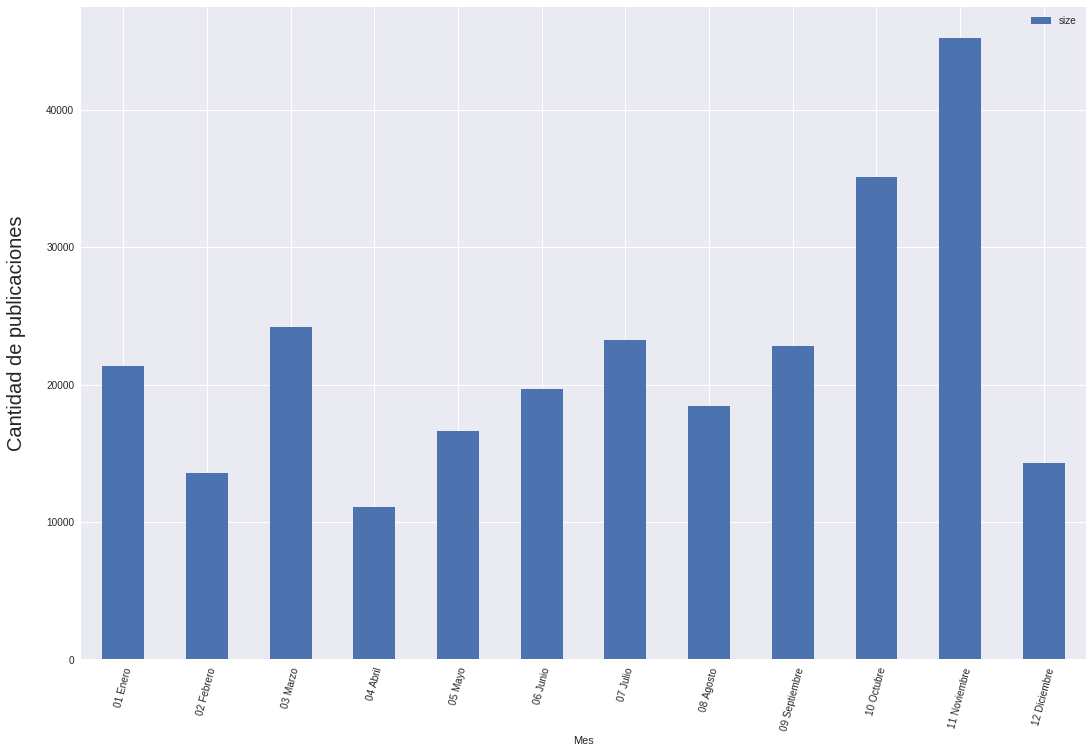

In [58]:
f= plt.figure()
ax = cant_por_mes['Size'].plot(kind='bar', rot=75, figsize=(18,12), ax=f.gca())
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0);
#ax.set_xlabel('Mes del año',size=20.0,labelpad=20.0);
#ax.set_title('Cantidad de publicaciones segun el mes del año',size=20.0)
plt.show()
